In [1]:
from os.path import join

import gensim
import arxiv
import pandas as pd

import itertools

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from concurrent.futures import ProcessPoolExecutor 

from nltk.stem import WordNetLemmatizer

In [2]:
lemmatizer = WordNetLemmatizer()


def stem(text):
  return lemmatizer.lemmatize(text)


def map_parallel(f, iterable, **kwargs):
  with ProcessPoolExecutor() as pool:
    result = pool.map(f, iterable, **kwargs)
  return result


def retrieve_articles(start, chunksize=1000):
  return arxiv.query(
    search_query=search_query,
    start=start,
    max_results=chunksize
  )


def extract_keywords(text):
  """
    Use gensim's textrank-based approach
  """
  return gensim.summarization.keywords(
    text=text,
    lemmatize=True,
    split=True
  )


def extract_mz_keywords(text):
  """
    Use gensim's Montemurro-Zanette method implementation
  """
  return gensim.summarization.mz_keywords(
    text=stem(text),
    blocksize=32,
    split=True
  )

# Load ML articles from arxiv

In [3]:
%%time

search_query = 'machine learning'

max_n_articles = 5000 

result_chunks = list(map_parallel(
  retrieve_articles,
  range(0, max_n_articles, 1000)
))

results = list(itertools.chain(*result_chunks))

print('Retrieved {} articles'.format(len(results)))

Retrieved 3000 articles
CPU times: user 274 ms, sys: 29 ms, total: 303 ms
Wall time: 16.9 s


## Display some basic information

In [4]:
n_examples = 20

for entry in results[:n_examples]:
  print(20 * '*')
  print(entry['title'])
  print(20 * '*')
  print(', '.join(entry['authors']))
  print(entry['date'])
  print(entry['summary'])
  print()

********************
Minimax deviation strategies for machine learning and recognition with
  short learning samples
********************
Michail Schlesinger, Evgeniy Vodolazskiy
2017-07-16T09:15:08Z
The article is devoted to the problem of small learning samples in machine
learning. The flaws of maximum likelihood learning and minimax learning are
looked into and the concept of minimax deviation learning is introduced that is
free of those flaws.

********************
MLBench: How Good Are Machine Learning Clouds for Binary Classification
  Tasks on Structured Data?
********************
Yu Liu, Hantian Zhang, Luyuan Zeng, Wentao Wu, Ce Zhang
2017-10-16T11:13:32Z
We conduct an empirical study of machine learning functionalities provided by
major cloud service providers, which we call machine learning clouds. Machine
learning clouds hold the promise of hiding all the sophistication of running
large-scale machine learning: Instead of specifying how to run a machine
learning task, users o

In [5]:
articles_df = pd.DataFrame(results)

In [6]:
articles_df.columns

Index(['affiliation', 'arxiv_comment', 'arxiv_primary_category', 'arxiv_url',
       'author', 'author_detail', 'authors', 'doi', 'guidislink', 'id',
       'journal_reference', 'links', 'pdf_url', 'published',
       'published_parsed', 'summary', 'summary_detail', 'tags', 'title',
       'title_detail', 'updated', 'updated_parsed'],
      dtype='object')

In [7]:
articles_df.head()

,affiliation,arxiv_comment,arxiv_primary_category,arxiv_url,author,author_detail,authors,doi,guidislink,id,...,pdf_url,published,published_parsed,summary,summary_detail,tags,title,title_detail,updated,updated_parsed
0,None,None,"{'term': 'cs.LG', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1707.04849v1,Evgeniy Vodolazskiy,{'name': 'Evgeniy Vodolazskiy'},"[Michail Schlesinger, Evgeniy Vodolazskiy]",None,True,http://arxiv.org/abs/1707.04849v1,...,http://arxiv.org/pdf/1707.04849v1,2017-07-16T09:15:08Z,"(2017, 7, 16, 9, 15, 8, 6, 197, 0)",The article is devoted to the problem of small...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.LG', 'label': None, 'scheme': 'h...",Minimax deviation strategies for machine learn...,"{'type': 'text/plain', 'language': None, 'base...",2017-07-16T09:15:08Z,"(2017, 7, 16, 9, 15, 8, 6, 197, 0)"
1,None,None,"{'term': 'cs.DC', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/1707.09562v3,Ce Zhang,{'name': 'Ce Zhang'},"[Yu Liu, Hantian Zhang, Luyuan Zeng, Wentao Wu...",None,True,http://arxiv.org/abs/1707.09562v3,...,http://arxiv.org/pdf/1707.09562v3,2017-07-29T21:59:18Z,"(2017, 7, 29, 21, 59, 18, 5, 210, 0)",We conduct an empirical study of machine learn...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.DC', 'label': None, 'scheme': 'h...",MLBench: How Good Are Machine Learning Clouds ...,"{'type': 'text/plain', 'language': None, 'base...",2017-10-16T11:13:32Z,"(2017, 10, 16, 11, 13, 32, 0, 289, 0)"
2,None,"109 pages, class notes of Machine Learning cou...","{'term': 'cs.LG', 'scheme': 'http://arxiv.org/...",http://arxiv.org/abs/0904.3664v1,Amnon Shashua,{'name': 'Amnon Shashua'},[Amnon Shashua],None,True,http://arxiv.org/abs/0904.3664v1,...,http://arxiv.org/pdf/0904.3664v1,2009-04-23T11:40:57Z,"(2009, 4, 23, 11, 40, 57, 3, 113, 0)",Introduction to Machine learning covering Stat...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'cs.LG', 'label': None, 'scheme': 'h...",Introduction to Machine Learning: Class Notes ...,"{'type': 'text/plain', 'language': None, 'base...",2009-04-23T11:40:57Z,"(2009, 4, 23, 11, 40, 57, 3, 113, 0)"
3,None,"Paper at AutoML workshop in ICML, 2015","{'term': 'stat.ML', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/1507.02188v1,Artus Krohn-Grimberghe,{'name': 'Artus Krohn-Grimberghe'},"[Abhishek Thakur, Artus Krohn-Grimberghe]",None,True,http://arxiv.org/abs/1507.02188v1,...,http://arxiv.org/pdf/1507.02188v1,2015-07-08T15:07:39Z,"(2015, 7, 8, 15, 7, 39, 2, 189, 0)","In this paper, we propose AutoCompete, a highl...","{'type': 'text/plain', 'language': None, 'base...","[{'term': 'stat.ML', 'label': None, 'scheme': ...",AutoCompete: A Framework for Machine Learning ...,"{'type': 'text/plain', 'language': None, 'base...",2015-07-08T15:07:39Z,"(2015, 7, 8, 15, 7, 39, 2, 189, 0)"
4,None,4 pages,"{'term': 'stat.ML', 'scheme': 'http://arxiv.or...",http://arxiv.org/abs/1212.2686v1,Yoshua Bengio,{'name': 'Yoshua Bengio'},"[Ian Goodfellow, Aaron Courville, Yoshua Bengio]",None,True,http://arxiv.org/abs/1212.2686v1,...,http://arxiv.org/pdf/1212.2686v1,2012-12-12T01:59:27Z,"(2012, 12, 12, 1, 59, 27, 2, 347, 0)",We introduce a new method for training deep Bo...,"{'type': 'text/plain', 'language': None, 'base...","[{'term': 'stat.ML', 'label': None, 'scheme': ...",Joint Training of Deep Boltzmann Machines,"{'type': 'text/plain', 'language': None, 'base...",2012-12-12T01:59:27Z,"(2012, 12, 12, 1, 59, 27, 2, 347, 0)"


## Extract keywords from summaries

In [9]:
%%time

articles_df['summary_keywords'] = pd.Series(list(map_parallel(extract_keywords, articles_df['summary'])))

CPU times: user 1.88 s, sys: 208 ms, total: 2.08 s
Wall time: 32.1 s


In [10]:
for __, row in itertools.islice(articles_df.iterrows(), n_examples):
  print(20 * '*')
  print(row['title'])
  print(20 * '*')
  print('keywords:', row['summary_keywords'])
  print()

********************
Minimax deviation strategies for machine learning and recognition with
  short learning samples
********************
keywords: ['learning']

********************
MLBench: How Good Are Machine Learning Clouds for Binary Classification
  Tasks on Structured Data?
********************
keywords: ['machine learning', 'clouds', 'study', 'code', 'classication', 'future', 'benchmark', 'comes']

********************
Introduction to Machine Learning: Class Notes 67577
********************
keywords: ['learning', 'duality', 'double', 'sampling']

********************
AutoCompete: A Framework for Machine Learning Competition
********************
keywords: ['machine', 'learned', 'evaluation', 'model', 'types', 'human interference']

********************
Joint Training of Deep Boltzmann Machines
********************
keywords: ['methods', 'machines', 'learning']

********************
Proceedings of the 2016 ICML Workshop on #Data4Good: Machine Learning in
  Social Good Application

In [11]:
article_keyword_lengths = articles_df['summary_keywords'].apply(len)

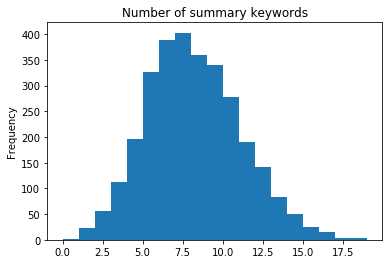

In [12]:
article_keyword_lengths.plot.hist(bins=article_keyword_lengths.max(), title='Number of summary keywords')

### Extract keywords using Montemurro-Zanette method

In [14]:
%%time

articles_df['mz_summary_keywords'] = pd.Series(list(map_parallel(extract_mz_keywords, articles_df['summary'])))

/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/gensim/summarization/mz_entropy.py:70: RuntimeWarning: divide by zero encountered in log2
  log_p = numpy.log2(p)
/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/gensim/summarization/mz_entropy.py:71: RuntimeWarning: invalid value encountered in multiply
  h = numpy.nan_to_num(p * log_p).sum(axis=0)
/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/gensim/summarization/mz_entropy.py:103: RuntimeWarning: invalid value encountered in double_scalars
  __log_combinations(n_words, blocksize)
/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/gensim/summarization/mz_entropy.py:103: RuntimeWarning: invalid value encountered in double_scalars
  __log_combinations(n_words, blocksize)
/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/gensim/summarization/mz_entropy.py:70: RuntimeWarning: divide by zero encountered in log2
  log_p = numpy.log2(p)
/opt/anaconda3/envs/nnets/lib/python3.5/site-packages/gensim/summarization/mz_ent

CPU times: user 1.95 s, sys: 184 ms, total: 2.13 s
Wall time: 24.3 s


In [15]:
articles_df['mz_summary_keywords'].apply(len).max()

27

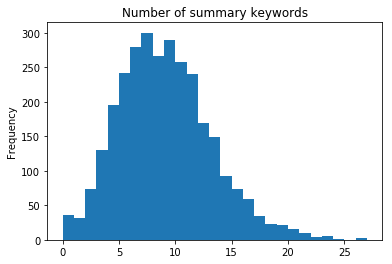

In [16]:
articles_df['mz_summary_keywords'].apply(len).plot.hist(bins=articles_df['mz_summary_keywords'].apply(len).max(), title='Number of summary keywords')

Unfortunately it looks like MZ method also extracts lots of stop words.

In [17]:
for __, row in itertools.islice(articles_df.iterrows(), n_examples):
  print(20 * '*')
  print(row['title'])
  print(20 * '*')
  print('keywords:', row['mz_summary_keywords'])
  print()

********************
Minimax deviation strategies for machine learning and recognition with
  short learning samples
********************
keywords: ['the', 'and', 'minimax']

********************
MLBench: How Good Are Machine Learning Clouds for Binary Classification
  Tasks on Structured Data?
********************
keywords: ['learning', 'machine', 'and', 'clouds', 'we', 'run', 'task', 'to', 'from', 'a', 'of', 'the']

********************
Introduction to Machine Learning: Class Notes 67577
********************
keywords: []

********************
AutoCompete: A Framework for Machine Learning Competition
********************
keywords: ['framework', 'this', 'to', 'a', 'machine']

********************
Joint Training of Deep Boltzmann Machines
********************
keywords: ['a', 'boltzmann', 'deep']

********************
Proceedings of the 2016 ICML Workshop on #Data4Good: Machine Learning in
  Social Good Applications
********************
keywords: []

********************
Temporal-related